# Сборный проект


<b><font size=5>Содержание</font></b><a name="to_content."></a>
* [0. Описание проекта](#0.)
    - [0.1. Описание столбцов](#0.1)
    
    
* [1. Загрузка данных](#1.)
     - [1.1. Вывод по данным](#1.1)
     

* [2. Предобработка данных](#2.)
     - [2.1. Столбцы](#2.1)
     - [2.2. Пропуски](#2.2)
     - [2.3. Изменение типа данных](#2.3)
     - [2.4. Столбец с общими продажами](#2.4)
     - [2.5. Вывод](#2.5)

     
* [3. Исследовательский анализ данных](#3.)
     - [3.1. Количество выпускаемых игр в разные годы](#3.1)
     - [3.2. Продажи по платформам](#3.2)
     - [3.3. Ящик с усами](#3.3)
     - [3.4. Оценки пользователей и критиков](#3.4)
     - [3.5. Распределение игр по жанрам](#3.5)
     
     
* [4. Портреты пользователей каждого региона](#5.)
     - [4.1. Самые популярные платформы](#5.1)
     - [4.2. Самые популярные жанры](#5.2)
     - [4.3. Рейтинг ESRB](#5.3)
     - [4.4. Вывод](#5.4)
     

* [5. Проверка гипотез ](#6.)
     - [5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#6.1)
     - [5.2. Средние пользовательские рейтинги жанров Action и Sports разные](#6.2)


* [6. Вывод](#7.) 

## Описание проекта
<a name="0."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание столбцов 

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Загрузка данных
<a name="1."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [1]:
#загружаю необходимые библотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/games.csv')
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


* Переименовать столбцы 'year_of_release', NA_sales, EU_sales, JP_sales, Other_sales
* Изменить тип данных в 'year_of_release'
* Привести названия к нижнему регистру
* Добавить столбец с общими продажами
* Убрать стоки, где отсутвует название игры (их всего две)
* Отсутвуют значения года, оценки критиков и оценки игроков 

## Предобработка данных
<a name="2."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

### Столбцы
<a name="2.1"></a><br/>

In [4]:
# переименновываю столбцы 
df.rename(columns={'Year_of_Release': 'year',
                  'NA_sales': 'na',
                  'EU_sales': 'eu',
                  'JP_sales': 'jp',
                  'JP_sales': 'jp',
                  'Other_sales': 'other',
                  'Name': 'game'}, inplace=True)

In [5]:
# изменяю регистр столбцов 
df.columns=df.columns.str.lower()

In [6]:
# проверяю
df.head(1)

,game,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


### Пропуски
<a name="2.2"></a><br/>

In [7]:
def nan_counter(dd):
    return (dd.isnull().sum().to_frame('Nan-count')
 .join((df.isnull().sum()/len(df)*100).to_frame('NaN, %').round(2))
 .sort_values(by='NaN, %', ascending=False)
 .style.set_caption('Данные о NaN')
)

In [8]:
nan_counter(df)

,Nan-count,"NaN, %"
critic_score,8578,51.32
rating,6766,40.48
user_score,6701,40.09
year,269,1.61
game,2,0.01
genre,2,0.01
platform,0,0
na,0,0
eu,0,0
jp,0,0


Здесь я вижу, что данные с отсутвующими именами, жанрами и годом можно удалить, так как отсутвует не более 2 процентов этих данных.


In [9]:
# удаляю данные с пропусками года
df = df.dropna(subset=['year']).reset_index(drop = True)

In [10]:
# удаляю данные с пропусками жанра
df = df.dropna(subset=['genre']).reset_index(drop = True)

In [11]:
# удаляю данные с пропусками названия
df = df.dropna(subset=['game']).reset_index(drop = True)

### Изменение типа данных
<a name="2.3"></a><br/>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
game            16444 non-null object
platform        16444 non-null object
year            16444 non-null float64
genre           16444 non-null object
na              16444 non-null float64
eu              16444 non-null float64
jp              16444 non-null float64
other           16444 non-null float64
critic_score    7983 non-null float64
user_score      9839 non-null object
rating          9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [13]:
#изменяю тип данных в столбце с годом
#перевожу тип данных в int
df['year'] = df['year'].astype('int')

In [14]:
# и из int в datetime
df['year'] = pd.to_datetime(df['year'],format='%Y')

In [15]:
df['year'] = df['year'].dt.to_period('Y')

In [16]:
# к сожалению, я не нашел другого способ избавиться от числа и месяца при таком выводе данных. 
#Можно было бы оставить int, но ведь это же всё-таки дата.
df

,game,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [17]:
# смотрю, какие значения есть в  'user_score'
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1         2
0.6       2
0.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [18]:
# в столбце 'user_score' есть значение 'tbd', которое говорит о том, что значение отсутвует
# убераю эти значения
df.loc[df['user_score'] == 'tbd', 'user_score'] = ''
# перевожу в числовой тип данных
df['user_score'] = pd.to_numeric(df['user_score'])

In [19]:
df['user_score'].value_counts()

7.8    322
8.0    285
8.2    276
8.3    252
7.5    249
      ... 
9.6      2
0.6      2
1.9      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
game            16444 non-null object
platform        16444 non-null object
year            16444 non-null period[A-DEC]
genre           16444 non-null object
na              16444 non-null float64
eu              16444 non-null float64
jp              16444 non-null float64
other           16444 non-null float64
critic_score    7983 non-null float64
user_score      7463 non-null float64
rating          9768 non-null object
dtypes: float64(6), object(4), period[A-DEC](1)
memory usage: 1.4+ MB


### Столбец с общими продажами
<a name="2.4"></a><br/>

In [21]:
df['world'] = df['na'] + df['eu'] + df['jp'] + df['other']

In [22]:
cols = list(df.columns.values)

In [23]:
cols

['game',
 'platform',
 'year',
 'genre',
 'na',
 'eu',
 'jp',
 'other',
 'critic_score',
 'user_score',
 'rating',
 'world']

In [24]:
df = df[['game',
 'platform',
 'year',
 'genre',
 'na',
 'eu',
 'jp',
 'other',
 'world',
 'critic_score',
 'user_score',
 'rating',]]

In [25]:
df

,game,platform,year,genre,na,eu,jp,other,world,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


Вывод
<a name="2.5"></a><br/>

* Я изменил тип данных в столбце с годом
* Удалил незначительное количество пропусков в строках
* Добавил столбец с продажами по миру
* Изменил названия столбцов 

## Исследовательский анализ данных
<a name="3."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

### Количество выпускаемых игр в разные годы
<a name="3.1"></a><br/>

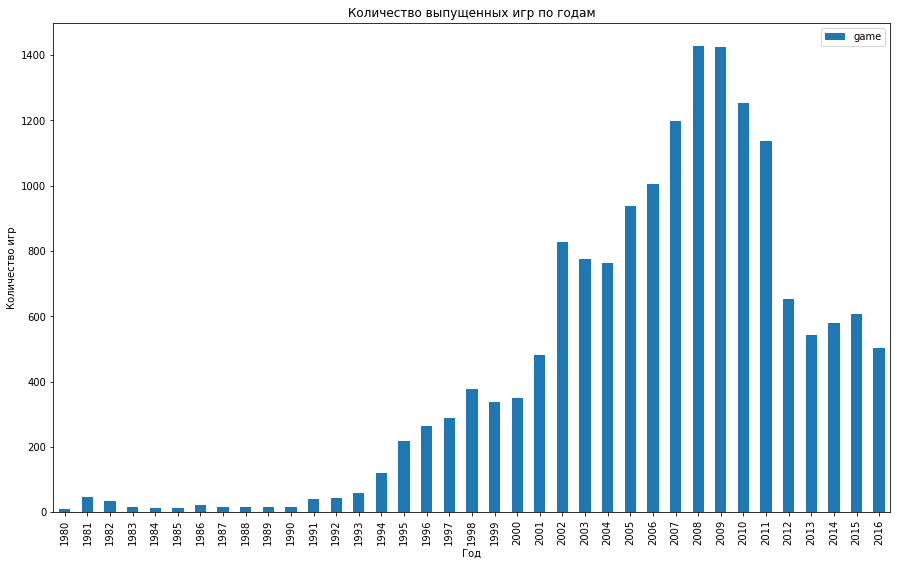

In [26]:
# строю график распределения выпуска игр по годам
df.pivot_table(index = 'year', values = 'game', aggfunc = 'count').plot(kind = 'bar', figsize = (15, 9)).set_title('Количество выпущенных игр по годам')
plt.ylabel('Количество игр')
plt.xlabel('Год')
plt.show()

На этом графике видно, что количество игр растёт с 1990 года до пика в 2008 и затем падает с 2016. Интересно, я думал иначе. Но это действительно логично, я думаю, что падение количества игр связано с удорожанием производства этих самых игр и лучше сделать одну очень крутую игру, чем несколько средних.

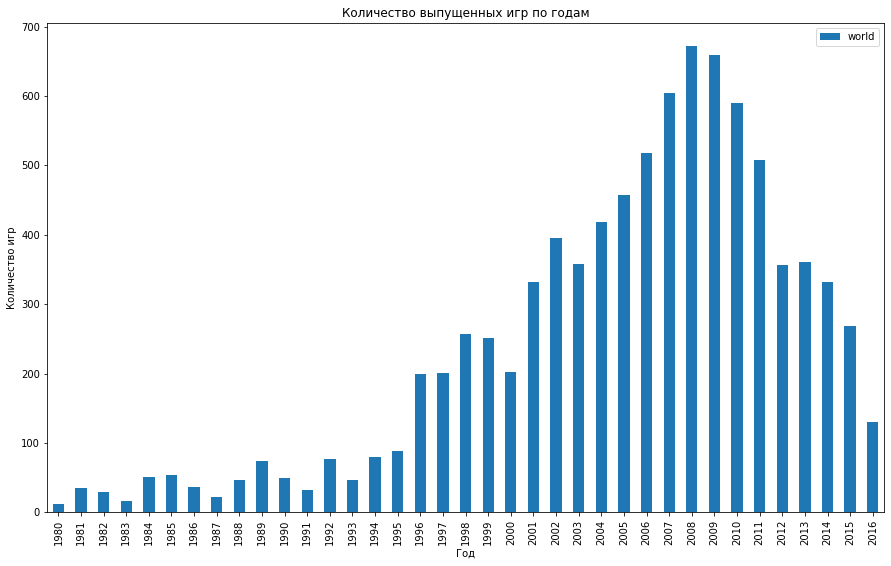

In [27]:
# строю график зависимости общего дохода от года 
df.pivot_table(index = 'year', values = 'world', aggfunc = 'sum').plot(kind = 'bar', figsize = (15, 9)).set_title('Количество выпущенных игр по годам')
plt.ylabel('Количество игр')
plt.xlabel('Год')
plt.show()

Интересно, что за последние несколько лет, эти графики становятся зеркальными то есть игр выпускаю с каждым годом все больше, но зарабатывают меньше.

Вообще, я не думаю, что для индустрии игр нужно расматривать период в 26 лет. Достаточно последних 3 года, так как эта сфера очень быстро меняется и то, что было 20 лет назад никак не влияет на сегодня.

In [28]:
# поэтому обрезаю таблицу и убераю всё что было до 2013 года
df1 = df.query('year >= 2013')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16443
Data columns (total 12 columns):
game            2233 non-null object
platform        2233 non-null object
year            2233 non-null period[A-DEC]
genre           2233 non-null object
na              2233 non-null float64
eu              2233 non-null float64
jp              2233 non-null float64
other           2233 non-null float64
world           2233 non-null float64
critic_score    991 non-null float64
user_score      1192 non-null float64
rating          1256 non-null object
dtypes: float64(7), object(4), period[A-DEC](1)
memory usage: 226.8+ KB


### Продажи по платформам
<a name="3.2"></a><br/>

Выбираю платформы с наибольшими суммарными продажами за весь период

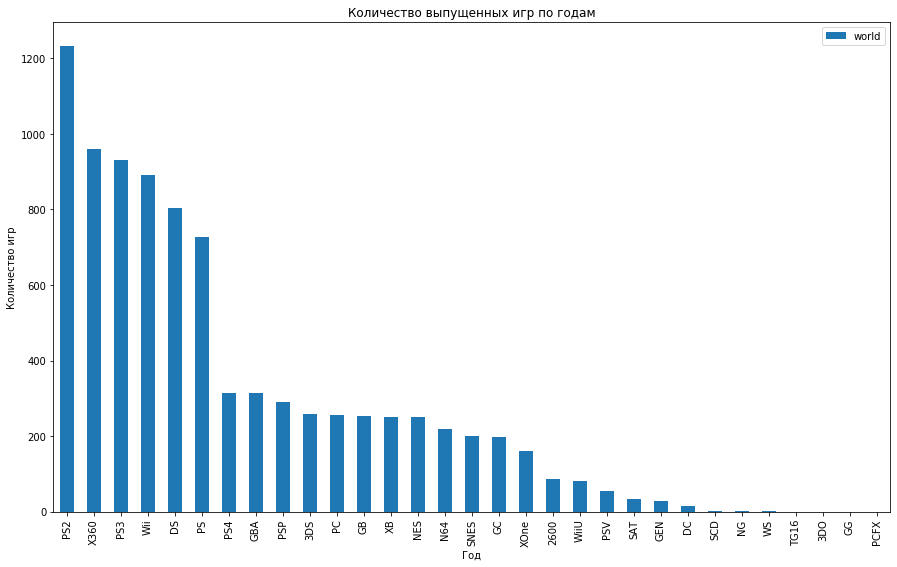

In [29]:
df.pivot_table(index = 'platform', values = 'world', aggfunc = 'sum').sort_values(by = 'world',ascending = False).plot(kind = 'bar', figsize = (15, 9)).set_title('Количество выпущенных игр по годам')
plt.ylabel('Количество игр')
plt.xlabel('Год')
plt.show()

Выбираю платформы с наибольшими суммарными продажами за последние 10 лет

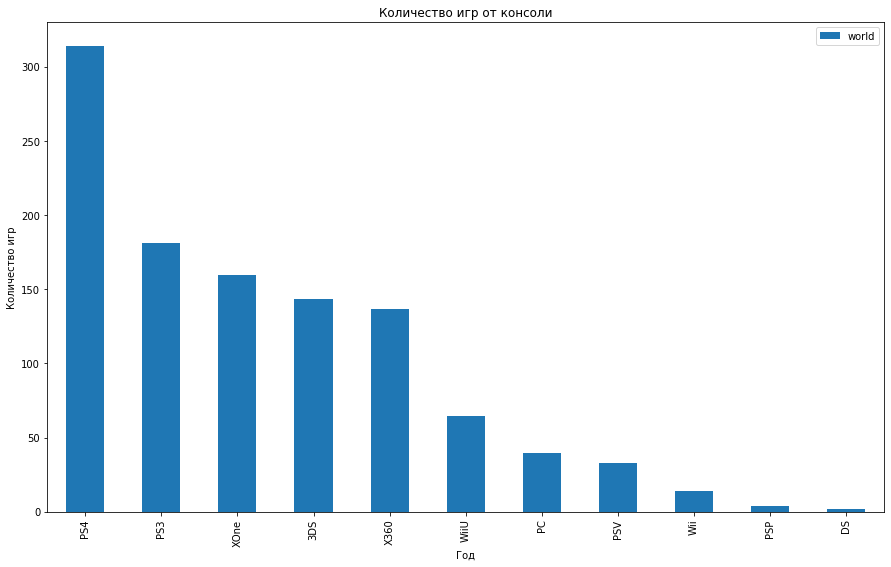

In [30]:
# строю график засисимости продажи игры от консоли
df1.pivot_table(index = 'platform', values = 'world', aggfunc = 'sum').sort_values(by = 'world',ascending = False).plot(kind = 'bar', figsize = (15, 9)).set_title('Количество игр от консоли')
plt.ylabel('Количество игр')
plt.xlabel('Год')
plt.show()

Наиболее доходными за последние 5 лет являются PS3, X360, PS4, 3DS и XOne.

In [31]:
# делаю сводную таблицу продаж игр по платформам 
platforms_sales = df1.pivot_table(index=('year', 'platform'), values='world', aggfunc='sum').reset_index()
platforms_sales.head()

,year,platform,world
0,2013,3DS,56.57
1,2013,DS,1.54
2,2013,PC,12.38
3,2013,PS3,113.25
4,2013,PS4,25.99


Text(0.5, 1.0, 'Динамика объемов продаж игр по платформам за период с 2013')

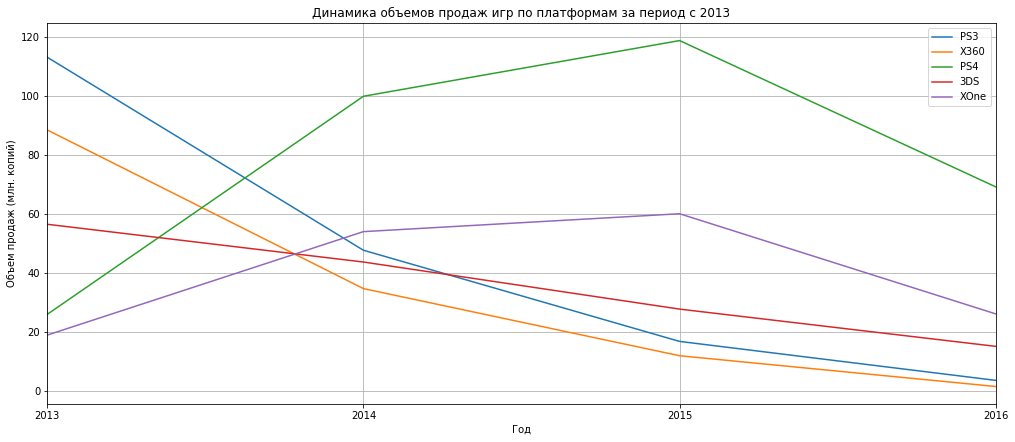

In [32]:
pop_platforms = pd.Series(['X360', 'PS4', '3DS', 'XOne'])
ax1 = platforms_sales.query('platform == "PS3"').plot(
    x='year', y='world', figsize=(17, 7), label='PS3'
)
for platform in pop_platforms:
    platforms_sales.query('platform == @platform').plot(
        x='year', y='world', figsize=(17, 7), grid = True , label=platform, ax=ax1
    )
plt.ylabel('Объем продаж (млн. копий)')
plt.xlabel('Год')
plt.title('Динамика объемов продаж игр по платформам за период с 2013')

Из этого графика понятно только, что на 2016 по продажам лидируют PS4 и XOne и все лидирующие платформы идут на спад.

In [33]:
#смотрю такую же динамику за весь период
# делаю сводную таблицу продаж игр по платформам 
platforms_sales_all = df.pivot_table(index=('year', 'platform'), values='world', aggfunc='sum').reset_index()
platforms_sales_all.head()

,year,platform,world
0,1980,2600,11.38
1,1981,2600,35.68
2,1982,2600,28.88
3,1983,2600,5.84
4,1983,NES,10.96


Text(0.5, 1.0, 'Динамика объемов продаж по платформам за весь период')

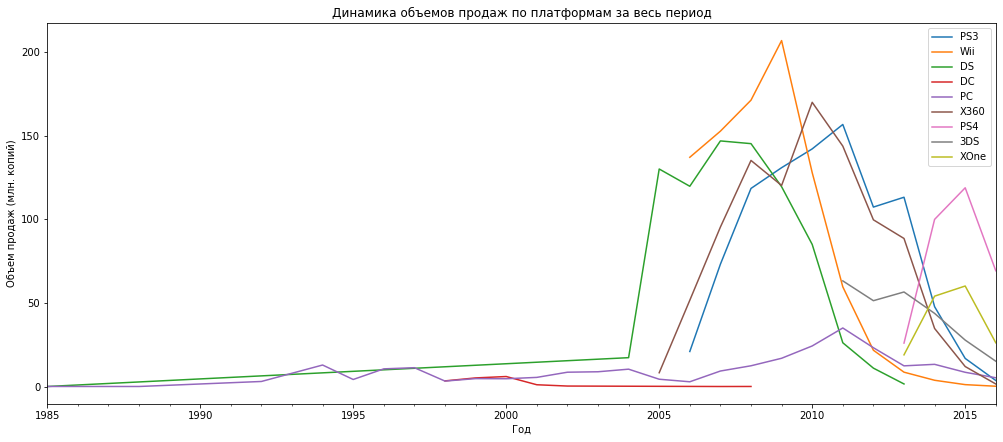

In [34]:
pop_platforms = pd.Series(['Wii', 'DS', 'DC', 'PC', 'X360', 'PS4', '3DS', 'XOne'])
ax1 = platforms_sales_all.query('platform == "PS3"').plot(
    x='year', y='world', figsize=(17, 7), label="PS3"
)
for platform in pop_platforms:
    platforms_sales_all.query('platform == @platform').plot(
        x='year', y='world', figsize=(17, 7), label=platform, ax=ax1
    )
plt.ylabel('Объем продаж (млн. копий)')
plt.xlabel('Год')
plt.title('Динамика объемов продаж по платформам за весь период')

По этой динамике можно сказать, что платформы могут жить активно около 3-4 лет выходя на пик и потом идут на спад. Интересно, что PC большую часть периода не выделяется большим объемом продаж, но живет дольше всех платформ. Может быть это очевидно или я ошибаюсь, но логично ждать очередную пару консолей, которая начнет резко расти в 2017 году. На данный момент наиболее перспективными являются PS4 и XOne.

### Ящик с усами
<a name="3.3"></a><br/>

Text(0.5, 1.0, 'Распределение объемов продаж отдельных игр по платформам')

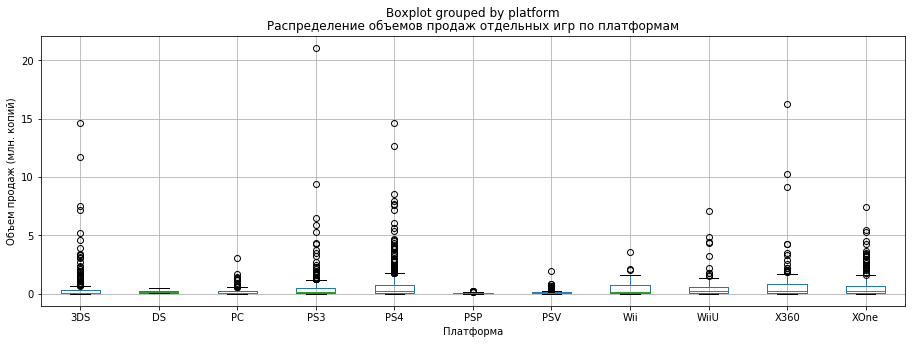

In [35]:
df1.boxplot(column='world', by='platform', figsize=(15,5))
plt.ylabel('Объем продаж (млн. копий)')
plt.xlabel('Платформа')
plt.title('Распределение объемов продаж отдельных игр по платформам')

Здесь видно интересную вещь: игры на предыдущие поколение имеею более хорошие продажи(PS3,X360,Wii). Возможно, это связано с тем, что новые платформы не показали весь свой потенциал.

### Оценки пользователей и критиков 
<a name="3.4"></a><br/>

PS4

In [36]:
# смотррю корреляцию
columns = ['user_score', 'critic_score', 'world']
PS4 = df.query('platform == "PS4"')
PS4[columns].corr()

,user_score,critic_score,world
user_score,1.000000,0.557654,-0.031957
critic_score,0.557654,1.000000,0.406568
world,-0.031957,0.406568,1.000000


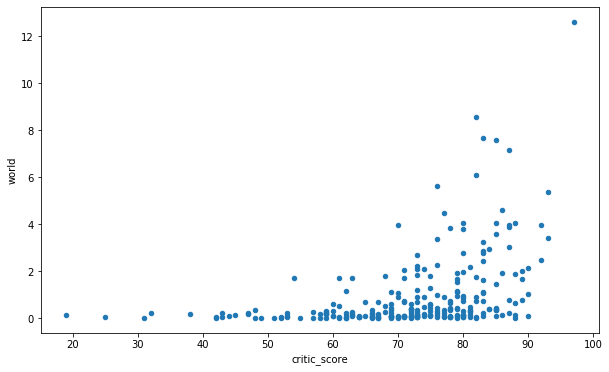

In [37]:
# график PS4 по критикам
PS4 = df[(df['platform'] == 'PS4') & (df['critic_score'] > 0)].copy()
PS4.plot(kind='scatter', x='critic_score', y='world', figsize=(10,6))

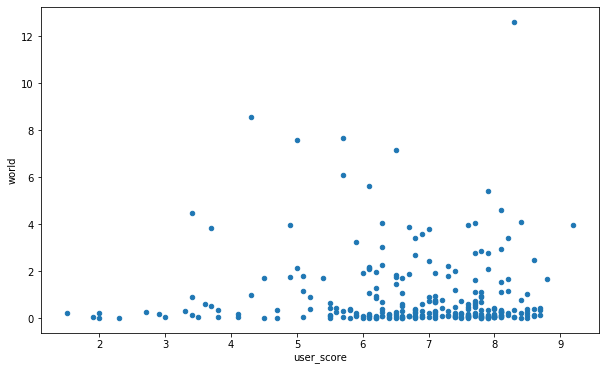

In [38]:
# график PS4 по пользователям
PS4 = df[(df['platform'] == 'PS4') & (df['user_score'] > 0)].copy()
PS4.plot(kind='scatter', x='user_score', y='world', figsize=(10,6))

In [39]:
XOne = df.query('platform == "XOne"')
XOne[columns].corr()

,user_score,critic_score,world
user_score,1.000000,0.472462,-0.068925
critic_score,0.472462,1.000000,0.416998
world,-0.068925,0.416998,1.000000


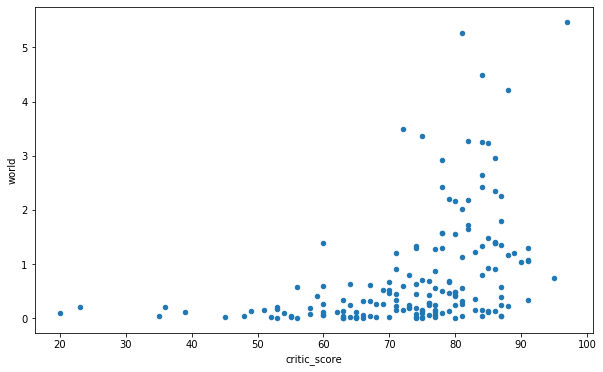

In [40]:
#график XOne по критикам
XOne = df[(df['platform'] == 'XOne') & (df['critic_score'] > 0)].copy()
XOne.plot(kind='scatter', x='critic_score', y='world', figsize=(10,6))

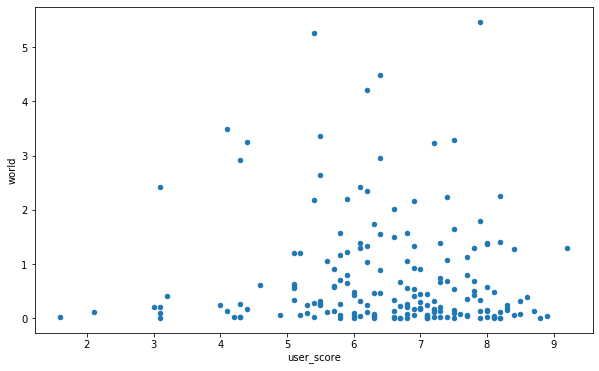

In [41]:
#график XOne по пользователям
XOne = df[(df['platform'] == 'XOne') & (df['user_score'] > 0)].copy()
XOne.plot(kind='scatter', x='user_score', y='world', figsize=(10,6))

WiiU

In [42]:
WiiU = df.query('platform == "WiiU"')
WiiU[columns].corr()

,user_score,critic_score,world
user_score,1.000000,0.77008,0.400219
critic_score,0.770080,1.00000,0.348380
world,0.400219,0.34838,1.000000


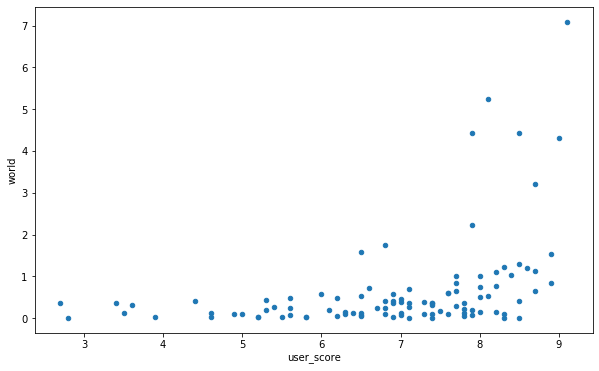

In [43]:
#график WiiU по пользователям
Wii = df[(df['platform'] == 'WiiU') & (df['user_score'] > 0)].copy()
Wii.plot(kind='scatter', x='user_score', y='world', figsize=(10,6))

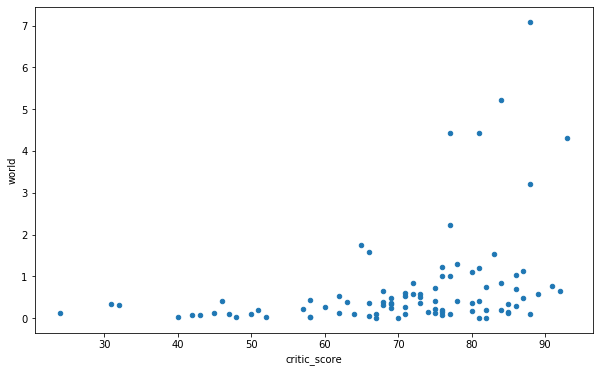

In [44]:
#график WiiU по критикам
WiiU = df[(df['platform'] == 'WiiU') & (df['critic_score'] > 0)].copy()
WiiU.plot(kind='scatter', x='critic_score', y='world', figsize=(10,6))

Из этих графиков и корреляции можно сделать вывод, что оценки критиков действительно влияют на продажи игр. Если оценка критиков выше 70 это определённо успешная игра. С PS4 и XOne на продажи игры не влияют оценки пользователей, игра может быть продаваться хорошо, но оценки будут плохие, но это не касается WiiU. Так что лучше ориентироваться на оценки критиков. 

### Распределение игр по жанрам
<a name="3.5"></a><br/>

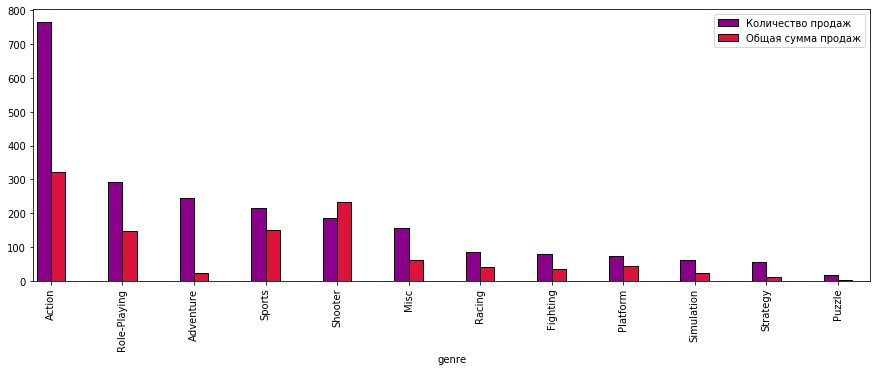

In [45]:
# строю график на котором отобразятся общие количество игр по жанрам и сколько денег они принесли
ax = plt.gca()

pivot = df1.groupby('genre').agg({'game': 'count', 'world': 'sum'}).sort_values(by='game', ascending=False)

plot1 = pivot['game']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='darkmagenta', position=1)

plot2 = pivot['world']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='crimson', position=0)

ax.legend(['Количество продаж', 'Общая сумма продаж'])
plt.show()

Здесь видно, что количество игр влияет на выручку не на прямую. Игр жанра shooter в три раза меньше, чем Action, но денег приносит сопостовимо. Жанры Role_Playing и Sport почти одинаковы в обоих показателях. Я бы в первую очередь отдавал предпочтение шутерам, спортивным, ролевым и экшен играм так как они наибольшее количество денег.

Вывод:
<a name="3.6"></a><br/>

На популярность игры много факторов: 
    * оценки критиков
    * жанр
    * платформа
Не влияют:
    * оценки пользователей 

## Портреты пользователей каждого региона
<a name="5."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

### Самые популярные платформы 
<a name="5.1"></a><br/>

North America

In [46]:
North_America = df1.pivot_table(index='platform', values='na', aggfunc='sum')


In [47]:
North_America = North_America.sort_values(by="na", ascending=False).reset_index()


In [48]:
# делаю колонку с долей продаж
North_America_sales_sum = North_America['na'].sum()
North_America['procent'] = (North_America['na'] / North_America_sales_sum * 100).round(1)
print("Топ 5 платформ Северной Америки:")
display(North_America.head(5))

Топ 5 платформ Северной Америки:


,platform,na,procent
0,PS4,108.74,24.8
1,XOne,93.12,21.3
2,X360,81.66,18.7
3,PS3,63.50,14.5
4,3DS,38.20,8.7


Japan

In [49]:
Japan = df1.pivot_table(index='platform', values='jp', aggfunc='sum')

In [50]:
Japan = Japan.sort_values(by="jp", ascending=False).reset_index()


In [51]:
Japan_sales_sum = Japan['jp'].sum()
Japan['procent'] = (Japan['jp'] / Japan_sales_sum * 100).round(1)
print("Топ 5 платформ Японии:")
display(Japan.head(5))

Топ 5 платформ Японии:


,platform,jp,procent
0,3DS,67.81,48.2
1,PS3,23.35,16.6
2,PSV,18.59,13.2
3,PS4,15.96,11.3
4,WiiU,10.88,7.7


Europe

In [52]:
Europe = df1.pivot_table(index='platform', values='eu', aggfunc='sum')

In [53]:
Europe = Europe.sort_values(by="eu", ascending=False).reset_index()

In [54]:
Europe_sales_sum = Europe['eu'].sum()
Europe['procent'] = (Europe['eu'] / Europe_sales_sum * 100).round(1)
print("Топ 5 платформ Европы:")
display(Europe.head(5))

Топ 5 платформ Европы:


,platform,eu,procent
0,PS4,141.09,36.0
1,PS3,67.81,17.3
2,XOne,51.59,13.2
3,X360,42.52,10.8
4,3DS,30.96,7.9


### Самые популярные жанры
<a name="5.2"></a><br/>

North_America

In [55]:
North_America_by_genre = df1.pivot_table(index='genre', values='na', aggfunc='sum').sort_values(by='na', ascending=False).reset_index()

In [56]:
North_America_sales_sum = North_America_by_genre['na'].sum()
North_America_by_genre['procent'] = (North_America_by_genre['na'] / North_America_sales_sum * 100).round(1)
print('Топ 5 жанров Северной Америки:')
display(North_America_by_genre.head(5))


Топ 5 жанров Северной Америки:


,genre,na,procent
0,Action,126.05,28.8
1,Shooter,109.74,25.1
2,Sports,65.27,14.9
3,Role-Playing,46.40,10.6
4,Misc,27.49,6.3


Japan

In [57]:
Japan_by_genre = df1.pivot_table(index='genre', values='jp', aggfunc='sum').sort_values(by='jp', ascending=False).reset_index()

In [58]:
Japan_sales_sum = Japan_by_genre['jp'].sum()
Japan_by_genre['procent'] = (Japan_by_genre['jp'] / Japan_sales_sum * 100).round(1)
print('Топ 5 жанров Японии:')
display(Japan_by_genre.head(5))


Топ 5 жанров Японии:


,genre,jp,procent
0,Role-Playing,51.04,36.3
1,Action,40.49,28.8
2,Misc,9.20,6.5
3,Fighting,7.65,5.4
4,Shooter,6.61,4.7


Europe

In [59]:
Europe_by_genre = df1.pivot_table(index='genre', values='eu', aggfunc='sum').sort_values(by='eu', ascending=False).reset_index()

In [60]:
Europe_sales_sum = Europe_by_genre['eu'].sum()
Europe_by_genre['procent'] = (Europe_by_genre['eu'] / Europe_sales_sum * 100).round(1)
print('Топ 5 жанров Европы:')
display(Europe_by_genre.head(5))

Топ 5 жанров Европы:


,genre,eu,procent
0,Action,118.13,30.1
1,Shooter,87.86,22.4
2,Sports,60.52,15.4
3,Role-Playing,36.97,9.4
4,Racing,20.19,5.1


### Влияние рейтинга ESRB на продажи в отдельном регионе
<a name="5.3"></a><br/>

Описание категорий рейтинга 

* «EC» («Early childhood») — «Для детей младшего возраста»:
* «E» («Everyone») — «Для всех»
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»
* «M» («Mature») — «Для взрослых»
* «AO» («Adults Only 18+») — «Только для взрослых»

North America

In [61]:
North_America_by_rating = df1.pivot_table(index='rating', values='na', aggfunc='sum').sort_values(by='na', ascending=False).reset_index()

In [62]:
# Посчитаем доли от общего объема продаж по региону в отдельную колонку
North_America_sum = North_America_by_rating['na'].sum()
North_America_by_rating['procent'] = (North_America_by_rating['na'] / North_America_sum * 100).round(1)
print("Популярность рейтингов в Северной Америке:")
display(North_America_by_rating.head(5))

Популярность рейтингов в Северной Америке:


,rating,na,procent
0,M,165.21,47.4
1,E,79.05,22.7
2,E10+,54.24,15.6
3,T,49.79,14.3


Japan

In [63]:
Japan_by_rating = df1.pivot_table(index='rating', values='jp', aggfunc='sum').sort_values(by='jp', ascending=False).reset_index()

In [64]:
Japan_sum = Japan_by_rating['jp'].sum()
Japan_by_rating['procent'] = (Japan_by_rating['jp'] / Japan_sum * 100).round(1)
print("Популярность рейтингов в Японии:")
display(Japan_by_rating.head(5))

Популярность рейтингов в Японии:


,rating,jp,procent
0,T,20.59,36.9
1,E,15.14,27.2
2,M,14.11,25.3
3,E10+,5.89,10.6


Europe

In [65]:
Europe_by_rating = df1.pivot_table(index='rating', values='eu', aggfunc='sum').sort_values(by='eu', ascending=False).reset_index()

In [66]:
Europe_sum = Europe_by_rating['eu'].sum()
Europe_by_rating['procent'] = (Europe_by_rating['eu'] / Europe_sum * 100).round(1)
print("Популярность рейтингов в Европе:")
display(Europe_by_rating.head(5))

Популярность рейтингов в Европе:


,rating,eu,procent
0,M,145.32,46.4
1,E,83.36,26.6
2,E10+,42.69,13.6
3,T,41.95,13.4


Вывод:
<a name="5.4"></a><br/>

Рейтинги Северной Америки и Европы похожи между собой и очень отличаются от Японии. В Северной Америке и Европе на первом месте игры для взрослых в Японии они занимают 1/4 от всех. Далее идут игры для всех, которые в Японии менее популярны, чем игры для подростков. На третьем месте в Европе игры для всех от 10 и старше, которые занимают такую же долю как и в Америке (13-15%), Японии они менее популярны (10%). Из этого стравнения видно, что Япония это особая страна и я считаю, что для неё нужен особый подход при состовлению плана продаж.

## Проверка гипотез 
<a name="6."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
<a name="6.1"></a><br/>

Формулирую две гипотезы: 
    * Нулевая: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    * Альтернативная: средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [74]:
XOne_rating = df[(df['platform'] == 'XOne') & (df['user_score'])]['user_score']
PC_ratings = df[(df['platform'] == 'PC') & (df['user_score'])]['user_score']

In [68]:
alpha = .01
results = st.ttest_ind(XOne_rating, PC_ratings, equal_var=False)

print('p-значение:',results.pvalue)

if results.pvalue < alpha:
    print('Принимаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые')
else:
    print('Отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой')

p-значение: 4.5385802963771776e-06
Принимаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


Так как центральная предельная теорема гарантирует нам нужный результат на больших выборках, я поставил значение equal_var = False.

### Средние пользовательские рейтинги жанров Action и Sports разные
<a name="6.2"></a><br/>

Формулирую две гипотезы:

* Нулевая: средний пользовательский рейтинг генеральной совокупности игр в жанре Action равен среднему пользовательскому рейтингу генеральной совокупности игр в жанре Sports.
* Альтернативная: средний пользовательский рейтинг генеральной совокупности игр в жанре Action не равен среднему пользовательскому рейтингу генеральной совокупности игр в жанре Sports.

In [69]:
action_ratings = df[(df['genre'] == 'Action') & (df['user_score'] > 0)]['user_score']
pc_ratings = df[(df['genre'] == 'Sports') & (df['user_score'] > 0)]['user_score']

In [70]:
alpha = .01
results = st.ttest_ind(action_ratings, pc_ratings, equal_var=False)

print('p-значение:',results.pvalue)

if results.pvalue < alpha:
    print('Принимаем нулевую гипотезу. Пользователи в среднем одинаково оценивают игры в жанрах action и sports')
else:
    print('Отвергаем нулевую гипотезу. Средняя оценка игр в жанрах action и sports отличается')

p-значение: 0.07370217419278534
Отвергаем нулевую гипотезу. Средняя оценка игр в жанрах action и sports отличается


## Вывод
<a name="7."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

* Рынок видеоигр активно развивался в течение 15 лет с 1993 до 2008. С 2008 года идет на спад. Как мне кажется, из-за того что на играх всё труднее зарабатывать. Достойная игра может делаться годами и в итоге её лстанутся недовольны. В отличие от условных мобильных игр, где цена на разработку ниже, но продать и 'потребить' игру легче.

* У меня сложилось впечатление, что рынку необходима новые консоли, которые поднимут продажи игр. На графике жизненого цикла консоли, я увидел, что нужно 2 года для того, чтобы консоль вышла на пик и несколько лет после она медленно умирает. На конец 2016 консоли мертвые и нужен какой-то новый форм-фактор, который будет продавать игры.

* На продажи не влияют оценки пользователей, но влияют оценки критиков. Я бы не стал ориентироваться на отзывы игроков, а обратил внимание на игры, которым критики ставят оценку 70 и выше. 

* Что касается жанров игр. Я бы обратил внимание на Action, Shooter, Sport и Role-Playing игры. Так как они наиболее популярны и приносят наибольшое количество денег. В Северной Америке и Европе наиболее популярными являются Action ~ 29%, Shooter ~ 23% и Sport~ 15% игры. В Японии же особая атмосфера Role-Playing ~ 36.3%,  Action ~ 28.8% и Misc ~ 6.5%.

* По категории игр. Тут Северная Америка и Европа так же очень похожи друг на друга. Там на первом месте игры для взрослых ~ 46%, на втором игры для всех 24%,  на третьем игры для всех от 10 лет 14%. И тут Япония выделяется на первом месте у неё игры для подростков ~ 36.9%, потом идут игры для всех 27.2 и потом уже игры для взрослых ~ 25.3.

* Подводя короткий итог, для выбора игр на продаж нужно учитывать множество факторов, таких как жанр игры, регион, игровую платформу и категорию игры и обчзательно обращать внимание на отзывы критиков.